### Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml
#our neural network
from neuralnetwork import Network,FCLayer,ActivationLayer,sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,binary_cross_entropy,binary_cross_entropy_prime,relu,relu_prime

#sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer

# from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
import itertools
from imblearn.over_sampling import RandomOverSampler

from neuralnetwork import Network,FCLayer,ActivationLayer
from neuralnetwork import sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,softmax,softmax_prime


### Data

In [2]:
# loading the data
congress = pd.read_csv('data/CongressionalVotingID.shuf.lrn.csv')

In [3]:
congress.head(5)

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,249,republican,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,140,democrat,y,n,y,n,n,y,y,y,y,n,n,n,n,n,y,y
2,383,democrat,y,y,n,y,y,y,n,n,n,n,y,n,y,y,n,unknown
3,201,democrat,n,n,y,n,n,n,y,y,y,n,n,n,n,y,y,y
4,297,republican,n,n,y,y,y,y,n,n,n,y,n,y,y,y,y,y


In [4]:
#Counting the number of samples for each class
print("Number of samples that belong to republican: ", str(len(congress[congress['class']=='republican'])),len(congress[congress['class']=='republican'])/len(congress), '%')
print("Number of samples that belong to democrat: ", str(len(congress[congress['class']=='democrat'])),len(congress[congress['class']=='democrat'])/len(congress), '%')

Number of samples that belong to republican:  81 0.37155963302752293 %
Number of samples that belong to democrat:  137 0.6284403669724771 %


##### Preparing the data

In [5]:
congress['class'] = congress['class'].map({'democrat': 1, 'republican': 0})

In [6]:
X = congress.drop(['class','ID'], axis=1)
Y = congress['class']

In [7]:
from sklearn.preprocessing import LabelEncoder

# Perform integer encoding
label_encoder = LabelEncoder()
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])
X = X.to_numpy()

encoder = OneHotEncoder(sparse = False)
y_reshaped = Y.to_numpy().reshape(-1,1)
Y = encoder.fit_transform(y_reshaped)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

### Our Neural Network Implementation

#### Hiperbolic tangent in the hidden layers & Sigmoid Function in the outer layers

Since the sigmoid function must be used in the output layer when  building a binary classifier, we used tanh in the hidden layers.


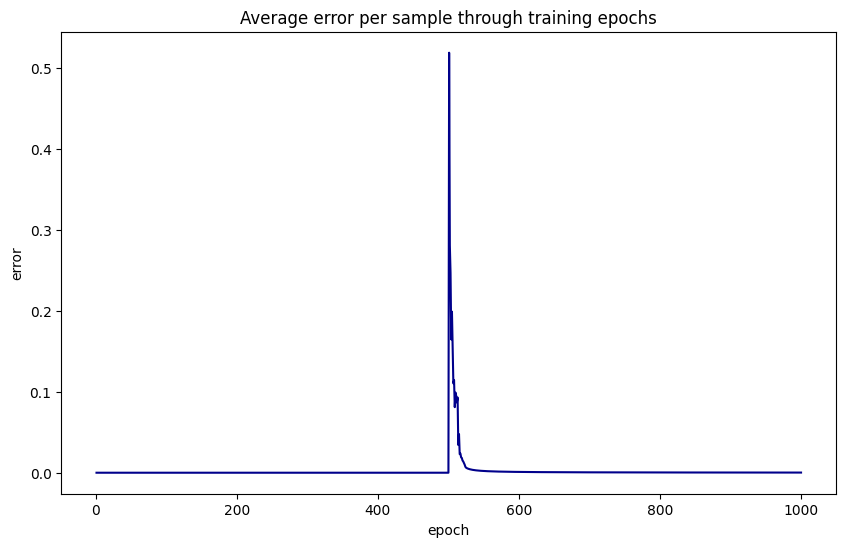

In [45]:
# network with 2 layers
net_sig = Network()
net_sig.add(FCLayer(16, 10))  
net_sig.add(ActivationLayer(tanh, tanh_prime))
net_sig.add(FCLayer(10,2))  
net_sig.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net_sig.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect_sig = net_sig.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net_sig.plot_error_curve(err_vect_sig)

In [37]:
# net_sig.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=500, learning_rate=0.1)

In [49]:
node_numbers = [10]
layer_numbers = [2]
err = {}
for i in itertools.product(node_numbers, layer_numbers):
        nodes, layers = i
        net = Network()
        net.add(FCLayer(input_size, nodes))
        net.add(ActivationLayer(tanh, tanh_prime))
        for _ in range(layers - 1):
            net.add(FCLayer(nodes, nodes))
            net.add(ActivationLayer(tanh, tanh_prime))
        net.add(FCLayer(nodes, output_size))
        net.add(ActivationLayer(softmax, softmax_prime))
        net.use(binary_cross_entropy_prime,binary_cross_entropy)
        err[i] = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)


Observations:
- As seen above, our first neural network performed very good and our model looks quite overfitted.

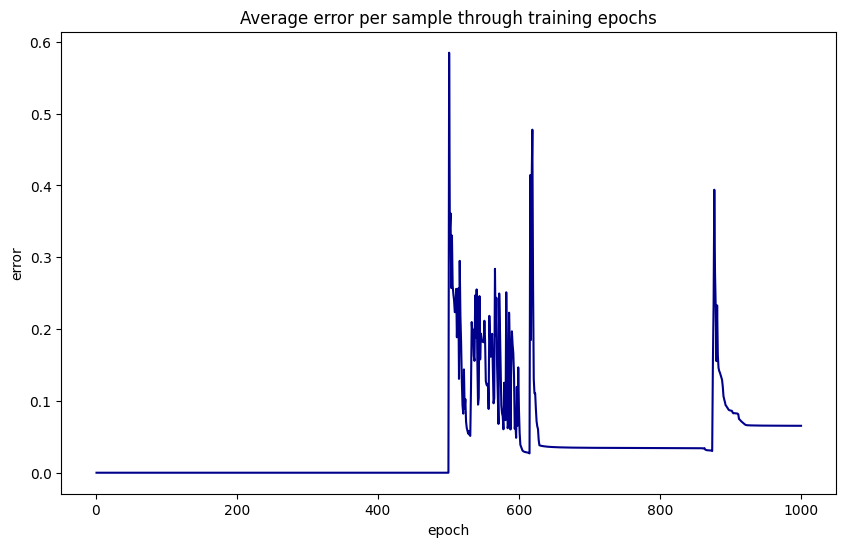

In [17]:
# network with 3 layers
net_sig = Network()
net_sig.add(FCLayer(16, 10))  
net_sig.add(ActivationLayer(tanh, tanh_prime))
net_sig.add(FCLayer(10, 10))  
net_sig.add(ActivationLayer(tanh, tanh_prime))
net_sig.add(FCLayer(10,2))  
net_sig.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net_sig.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect_sig = net_sig.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net_sig.plot_error_curve(err_vect_sig)

##################################################
Accuracy on train:  0.9942528735632183
Accuracy on test:  0.9772727272727273
##################################################
Balanced Accuracy on train:  0.9954128440366973
Balanced Accuracy on test:  0.96875
##################################################
Recall on train:  0.9908256880733946
Recall on test:  1.0
##################################################
Precision on train:  1.0
Precision on test:  0.9655172413793104
##################################################


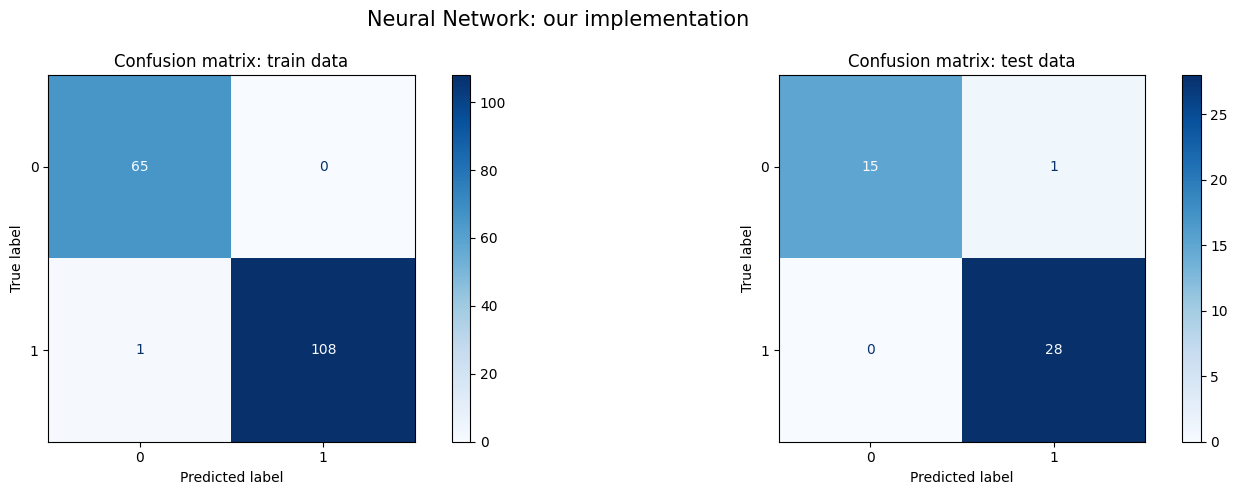

In [18]:
net_sig.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=500, learning_rate=0.1)

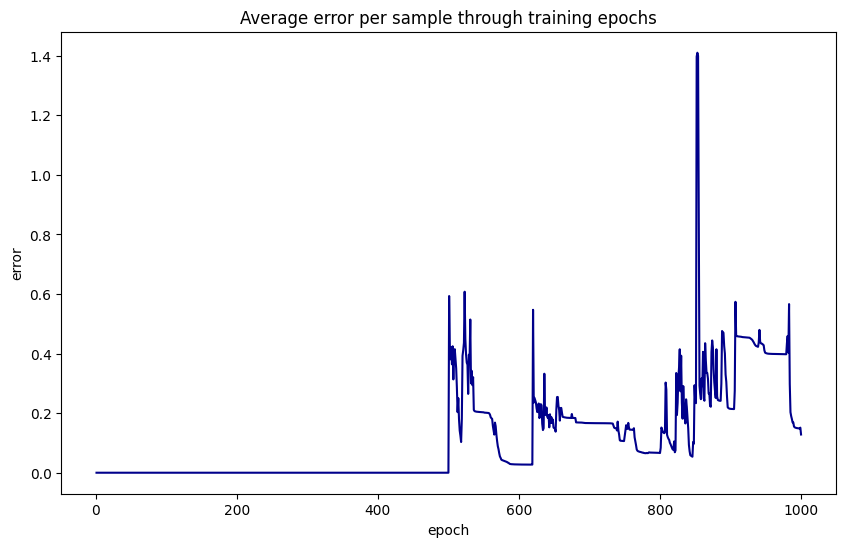

In [19]:
# network with 4 layers
net_sig = Network()
net_sig.add(FCLayer(16, 10))  
net_sig.add(ActivationLayer(tanh, tanh_prime))
net_sig.add(FCLayer(10, 10))  
net_sig.add(ActivationLayer(tanh, tanh_prime))
net_sig.add(FCLayer(10, 10))  
net_sig.add(ActivationLayer(tanh, tanh_prime))
net_sig.add(FCLayer(10,2))  
net_sig.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net_sig.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect_sig = net_sig.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net_sig.plot_error_curve(err_vect_sig)

##################################################
Accuracy on train:  0.9770114942528736
Accuracy on test:  0.9772727272727273
##################################################
Balanced Accuracy on train:  0.9723359209597742
Balanced Accuracy on test:  0.96875
##################################################
Recall on train:  0.9908256880733946
Recall on test:  1.0
##################################################
Precision on train:  0.972972972972973
Precision on test:  0.9655172413793104
##################################################


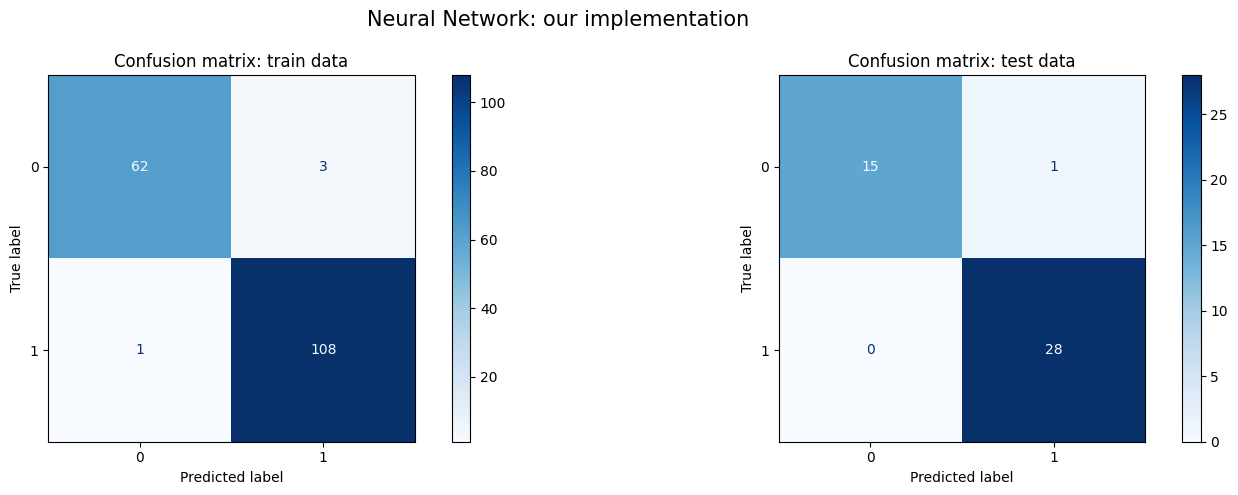

In [20]:
net_sig.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_test, y_test=y_test, epochs=500, learning_rate=0.1)

In [90]:
# layer_numbers = [2,3,4,5]
# input_size = 16
# output_size = 2

# err = {}

# for layers in layer_numbers:
#         net = Network()
#         net.add(FCLayer(input_size, 10))
#         net.add(ActivationLayer(tanh, tanh_prime))
#         for _ in range(layers - 2):
#             net.add(FCLayer(10, 10))
#             net.add(ActivationLayer(tanh, tanh_prime))
#         net.add(FCLayer(10, output_size))
#         net.add(ActivationLayer(sigmoid, sigmoid_prime))
#         net.use(binary_cross_entropy_prime,binary_cross_entropy)

#         # Train the network
#         net.fit(X_train, y_train, epochs=100, learning_rate=0.1)
#         err[layers] = net.fit(X_train, y_train, epochs=100, learning_rate=0.1)



#### Rectified Linear function in the hidden layers & Sigmoid Function in the outer layers
